In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt   

In [3]:
def meanfilter(image,ksize):
    img=cv2.imread(image)
    m = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    kernel = (1 / 9) * np.ones((ksize, ksize))
    imagewidth,imageheight=m.shape
    paddingheight,paddingwidth=(kernel.shape[0]//2),(kernel.shape[1]//2)
    pad=np.zeros((imagewidth+(paddingheight*2), imageheight+(paddingwidth*2)))
    pad.shape
    pad[paddingwidth:paddingwidth+imagewidth,paddingheight:paddingheight+imageheight]=m
    output=np.zeros((imagewidth,imageheight))
    for row in range(imagewidth):
        for col in range(imageheight):
            output[row,col]=np.sum(pad[row:row+ksize,col:col+ksize]*kernel)
    
    plt.imshow(output,cmap='gray')
        

In [4]:
def GaussianFilter(image,ksize):
    img=cv2.imread(image)
    m = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    k=np.linspace(-ksize//2,ksize//2,ksize)
    j=np.zeros(k.shape)
    for i in range(k.size):
        j[i]=(np.pi*ksize) * np.exp(-0.5*((k[i]-0)/ksize)**2)
    r = np.outer(j,j)
    maxv=np.max(r)
    rwidth,rheight=r.shape
    gausskernel=np.zeros(r.shape)
    for row in range(rwidth):
        for col in range(rheight):
            gausskernel[row,col]=(r[row][col])/maxv
            
    imagewidth,imageheight=m.shape
    paddingheight,paddingwidth=(gausskernel.shape[0]//2),(gausskernel.shape[1]//2)
    pad=np.zeros((imagewidth+(paddingheight*2), imageheight+(paddingwidth*2)))
    pad.shape
    pad[paddingwidth:paddingwidth+imagewidth,paddingheight:paddingheight+imageheight]=m
    output=np.zeros((imagewidth,imageheight))
    for row in range(imagewidth):
        for col in range(imageheight):
            output[row,col]=np.sum(pad[row:row+gausskernel.shape[0],col:col+gausskernel.shape[1]]*gausskernel)
    
    plt.imshow(output,cmap='gray')



        

In [5]:
def threshold(image):
    image=cv2.imread(image)
    m = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    imagewidth,imageheight=m.shape
    avg=np.average(m)
    output=np.zeros((imagewidth,imageheight))
    for row in range(imagewidth):
        for col in range(imageheight):
            if m[row,col]>=avg:
                output[row,col]=255
            else:
                output[row,col]=0
    plt.imshow(output,cmap='gray')
        

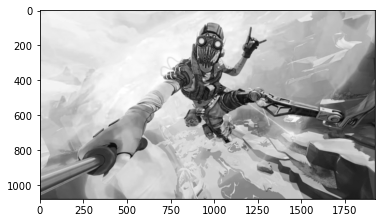

In [6]:
meanfilter('testi.jpg',5)

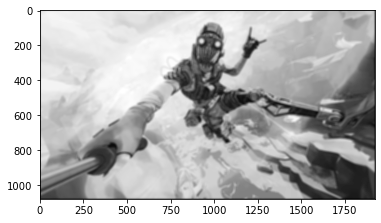

In [7]:
GaussianFilter('testi.jpg',15)

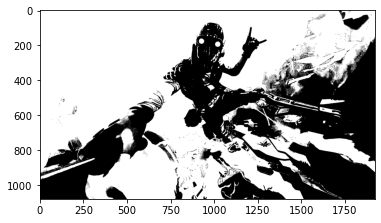

In [8]:
threshold('testi.jpg')